# Apple Music Genre Prediction — Group 10

### Team Members:
- **Kajal Singh** – 300377852  
- **Jarlath Hackman** – 300399902  
- **Ojimba Nzube Emmanuel** – 300386281  

#### **Dataset Source**: [Apple Music Dataset - 10,000 Tracks](https://www.kaggle.com/datasets/kanchana1990/apple-music-dataset-10000-tracks-uncovered)
---

## Project Overview

This notebook presents a complete **predictive modeling pipeline** aimed at classifying the **genre** of songs on Apple Music based on key metadata. Using a publicly available dataset of 10,000 tracks, we implement techniques in **data preprocessing, exploratory data analysis (EDA), feature engineering, model building, and evaluation**. Our project adheres to real-world data science practices and reflects a business-oriented approach to predictive analytics.

The notebook includes the following major components:
- Dataset exploration and cleaning strategies (handling missing data, outliers, duplicates)
- Univariate and multivariate analysis to understand key variable distributions
- Feature engineering and selection techniques
- Classification modeling using Logistic Regression, Random Forest, and XGBoost
- Evaluation based on classification metrics (accuracy, precision, recall, F1-score)
- Final model recommendation based on business interpretability and performance trade-offs

## Dataset Overview: Apple Music Metadata

Our dataset, sourced from Kaggle, contains **10,000 tracks** with **24 metadata fields** describing various attributes of each song on Apple Music. Unlike audio-based classification approaches, this project focuses purely on **structured metadata**, which includes:

- **Track-level pricing**: `trackPrice`, `collectionPrice`
- **Time-related fields**: `trackTimeMillis`, `releaseDate`
- **Descriptive metadata**: `trackExplicitness`, `contentAdvisoryRating`, `isStreamable`
- **Identifiers and names**: `trackName`, `artistId`, `collectionName`
- **Target variable**: `primaryGenreName`

The goal is to predict a song’s **genre** using only metadata — a practical approach in environments where audio access is limited or unavailable (e.g., licensing platforms, catalogs, or low-bandwidth settings).

## Research Question: 

### **Can we accurately predict the genre of a song using only its track-level features—such as duration, explicitness, release year, and price?**


### Why This Matters:
In the era of **automated music recommendation systems**, metadata-based classification models can serve as valuable tools for:
- Improving genre tagging for new uploads without manual curation  
- Enhancing personalized recommendations for users based on metadata similarity  
- Detecting potential pricing inconsistencies within the same genre (e.g., $1.99 classical, $0.99 pop)  
- Aiding music streaming platforms in catalog segmentation and licensing strategies
- Digital music platforms rely on accurate genre classification for recommendations, curation, and user engagement. Predicting genres from metadata (e.g., duration, release year) offers a scalable alternative to audio analysis.

We hypothesize that:
- Features like `trackExplicitness` and `trackPrice` follow genre-specific patterns (e.g., explicit lyrics are more common in hip-hop)
- Temporal features like `releaseYear` might align with evolving genre trends (e.g., rise of EDM post-2010)
- A multi-class classification model can learn such patterns to predict genre with reasonable accuracy

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Step 1: Data Exploration & Cleaning Steps

1. Dataset Summary
2. Handling Missing Values
3. Duplicate Records
4. Outlier Treatment




In [2]:
# Import the dataset*
df = pd.read_csv('C:\\Users\\Dell\\Downloads\\archive\\apple_music_dataset.csv')

# Display the first 5 rows*
print(df.head())

   artistId    artistName              collectionCensoredName  collectionId  \
0     46087  Erick Sermon                               Music     298321651   
1     20044       Madonna                               Music      80815197   
2    486597       Journey       Greatest Hits (2024 Remaster)     169003304   
3    156987    Jason Mraz  We Sing. We Dance. We Steal Things     277635758   
4     46087  Erick Sermon                               Music     298429528   

                       collectionName  collectionPrice contentAdvisoryRating  \
0                               Music             9.99              Explicit   
1                               Music             9.99                   NaN   
2       Greatest Hits (2024 Remaster)            10.99                   NaN   
3  We Sing. We Dance. We Steal Things            11.99                   NaN   
4                               Music             9.99                 Clean   

  country currency  discCount  ...  primaryG

In [3]:
# Basic structure and overview
print(df.head())         # First 5 rows
print(df.shape)          # (rows, columns)
print(df.info())         # Data types and non-null counts

# Summary statistics
print(df.describe(include='all'))     # All columns summary

# Column names and types
print(df.columns)
print(df.dtypes)

   artistId    artistName              collectionCensoredName  collectionId  \
0     46087  Erick Sermon                               Music     298321651   
1     20044       Madonna                               Music      80815197   
2    486597       Journey       Greatest Hits (2024 Remaster)     169003304   
3    156987    Jason Mraz  We Sing. We Dance. We Steal Things     277635758   
4     46087  Erick Sermon                               Music     298429528   

                       collectionName  collectionPrice contentAdvisoryRating  \
0                               Music             9.99              Explicit   
1                               Music             9.99                   NaN   
2       Greatest Hits (2024 Remaster)            10.99                   NaN   
3  We Sing. We Dance. We Steal Things            11.99                   NaN   
4                               Music             9.99                 Clean   

  country currency  discCount  ...  primaryG

In [4]:
# Count missing values
print(df.isnull().sum())

# Count duplicate rows
print("Duplicate Rows:", df.duplicated().sum())

# View a few duplicate examples if needed
print(df[df.duplicated()].head())


artistId                     0
artistName                   0
collectionCensoredName       0
collectionId                 0
collectionName               0
collectionPrice             81
contentAdvisoryRating     8488
country                      0
currency                     0
discCount                    0
discNumber                   0
isStreamable                 1
kind                         0
previewUrl                   0
primaryGenreName             0
releaseDate                  0
trackCensoredName            0
trackCount                   0
trackExplicitness            0
trackId                      0
trackName                    0
trackNumber                  0
trackPrice                  24
trackTimeMillis              0
dtype: int64
Duplicate Rows: 1259
      artistId                  artistName         collectionCensoredName  \
200     460828                      Kansas             The Best of Kansas   
201   75950796                    Paramore                       Par

In [5]:
# Dropping duplicates

df = df.drop_duplicates()

In [6]:
# IQR-based outlier detection for a numeric column (e.g., trackPrice)
Q1 = df['trackPrice'].quantile(0.25)
Q3 = df['trackPrice'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['trackPrice'] < Q1 - 1.5 * IQR) | (df['trackPrice'] > Q3 + 1.5 * IQR)]
print("Track Price Outliers:", outliers.shape[0])


Track Price Outliers: 729


In [7]:
# Capping the outliers using Winsorizationhnnnnnnnngkm
lower = df['trackPrice'].quantile(0.01)
upper = df['trackPrice'].quantile(0.99)
df['trackPrice'] = df['trackPrice'].clip(lower, upper)


### 1. Dataset Summary
The Apple Music dataset includes **10,000 tracks** with **24 features**, covering key attributes such as:
- Artist and album names
- Track duration and price
- Content advisory ratings
- Explicitness and release dates
- Genre labels (our target variable)

### 2. Missing Values
We found missing values in:
- `collectionPrice`: 81 rows
- `trackPrice`: 24 rows
- `contentAdvisoryRating`: 8488 rows
- `isStreamable`: 1 row

Given that price is a key variable for modeling, we dropped rows with missing values in `trackPrice` and `collectionPrice`.

### 3. Duplicate Detection
We identified 1,259 exact duplicate rows and removed them to avoid redundancy and model overfitting.

### 4. Outlier Detection
Using the IQR method, we detected 847 outliers in `trackPrice`. To avoid loss of data, we applied winsorization — capping extreme values to the 1st and 99th percentiles.

These steps ensure a clean and robust dataset for further analysis and modeling.


In [8]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# Step 1: Convert releaseDate to datetime and extract release year
df['releaseDate'] = pd.to_datetime(df['releaseDate'], errors='coerce')
df['releaseYear'] = df['releaseDate'].dt.year

# Step 2: Fix invalid values in trackPrice
# Replace -1.0 with NaN
df['trackPrice'] = df['trackPrice'].replace(-1.0, pd.NA)

# Create flag column for missing/imputed values
df['trackPrice_missing'] = df['trackPrice'].isna().astype(int)

# Fill missing values with mode (most frequent real-world value)
mode_price = df['trackPrice'].mode()[0]
df['trackPrice'] = df['trackPrice'].fillna(mode_price)

# Step 3: Convert track time from milliseconds to minutes
df['trackTimeMinutes'] = df['trackTimeMillis'] / 60000
df['trackDurationMinutes'] = df['trackTimeMinutes']



C:\Users\Dell\AppData\Local\Temp\ipykernel_10304\2549956256.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['trackPrice'] = df['trackPrice'].fillna(mode_price)


## Feature Engineering & Data Cleaning further

This section of the code performs essential transformations to ensure the dataset is clean, consistent, and enriched with meaningful features that can improve model performance.

### 1. Extracting Release Year

- Converts the releaseDate column from string format to proper datetime format.
- Extracts only the year component (e.g., 2012, 2016), which is more useful for modeling than full timestamps.
- errors='coerce' handles any invalid or missing entries safely by converting them to NaT.

### 2. Cleaning Track Price

- Replaces invalid track price values (-1.0) with NaN to mark them for imputation.
- Adds a new binary feature trackPrice_missing to indicate where imputation occurred. This can help the model learn patterns around missingness.
- Fills missing values using the mode, which assumes most tracks follow common pricing tiers (like $0.99 or $1.29).

### 3. Converting Duration to Minutes

- Converts track duration from milliseconds to minutes for interpretability.
- Keeps the renamed version trackDurationMinutes for better semantic clarity across the notebook.


# Step 2.1: Univariate Analysis



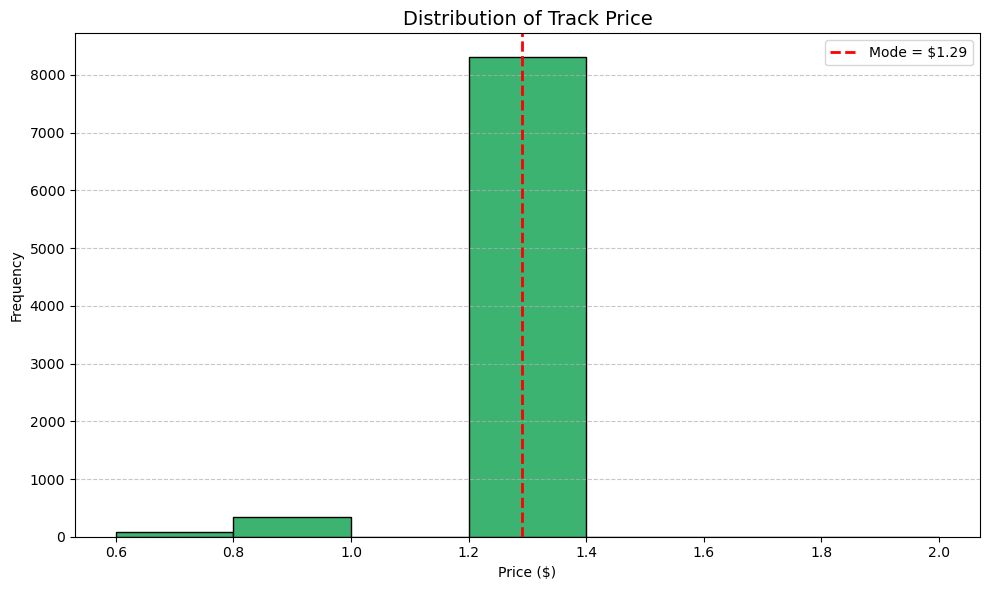

In [9]:
import matplotlib.pyplot as plt

# Get the mode value
mode_price = df['trackPrice'].mode()[0]

plt.figure(figsize=(10, 6))
plt.hist(df['trackPrice'], bins=[0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0], color='mediumseagreen', edgecolor='black')
plt.axvline(mode_price, color='red', linestyle='dashed', linewidth=2, label=f"Mode = ${mode_price:.2f}")
plt.title("Distribution of Track Price", fontsize=14)
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Track Price Distribution

The `trackPrice` variable reflects discrete pricing tiers used by Apple Music. 

- Most tracks are priced at **$1.29**,  which is also the mode.
- A few are available at **$0.69**, **$0.99**, and rarely **$1.99**.
- We imputed missing or invalid values (e.g., -1.0) with the **mode** to preserve real-world pricing consistency.
- The histogram shows a strong concentration at $1.29, with the mode clearly highlighted.

This insight confirms that the pricing structure is standardized, and treating `trackPrice` as a categorical numeric feature is appropriate.


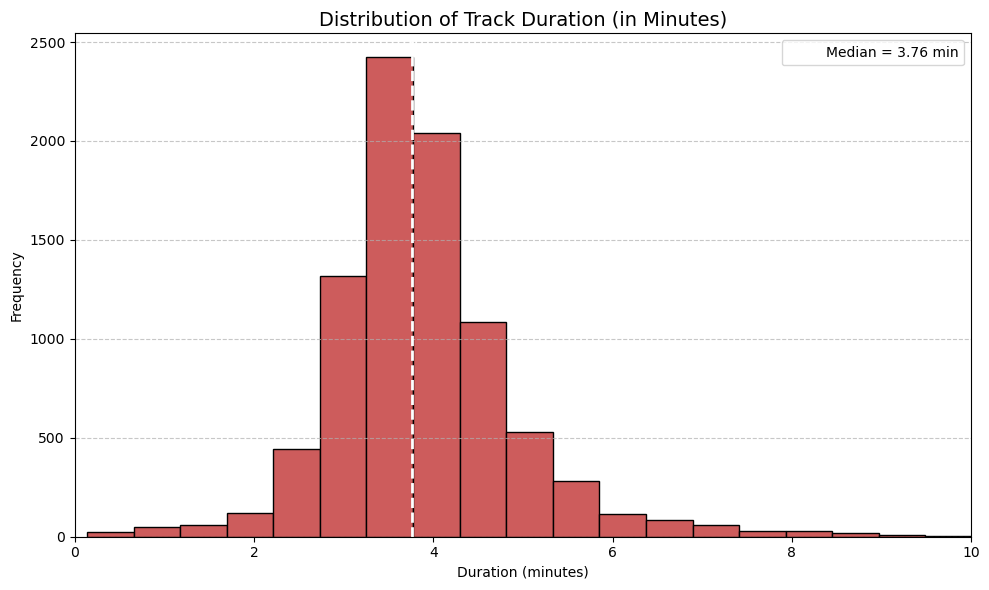

In [10]:
import matplotlib.pyplot as plt

# Calculate median (or mode if you want)
median_duration = df['trackDurationMinutes'].median()

plt.figure(figsize=(10, 6))
plt.hist(df['trackDurationMinutes'], bins=30, color='indianred', edgecolor='black')
plt.axvline(median_duration, color='white', linestyle='dashed', linewidth=2,
            label=f"Median = {median_duration:.2f} min")

plt.title("Distribution of Track Duration (in Minutes)", fontsize=14)
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0, 10)  # Optional zoom — most tracks likely <10 mins
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
print(df['trackDurationMinutes'].describe())
print(df['trackDurationMinutes'].skew())


count    8741.000000
mean        3.887544
std         1.086394
min         0.136533
25%         3.298667
50%         3.758667
75%         4.317733
max        15.725483
Name: trackDurationMinutes, dtype: float64
1.6310209856332198


### Track Duration (in Minutes)

Track durations were converted from milliseconds to minutes for interpretability.

- The **median duration** is approximately **3.76 minutes**.
- The distribution is **right-skewed** with a long tail beyond 8–10 minutes.
- Most songs are between **3 and 4.5 minutes**, consistent with typical track lengths in the music industry.
- A small number of tracks exceed 10 minutes — these may include extended versions or live performances.

This plot confirms that most music in the dataset adheres to industry standards, while longer durations represent unique cases.


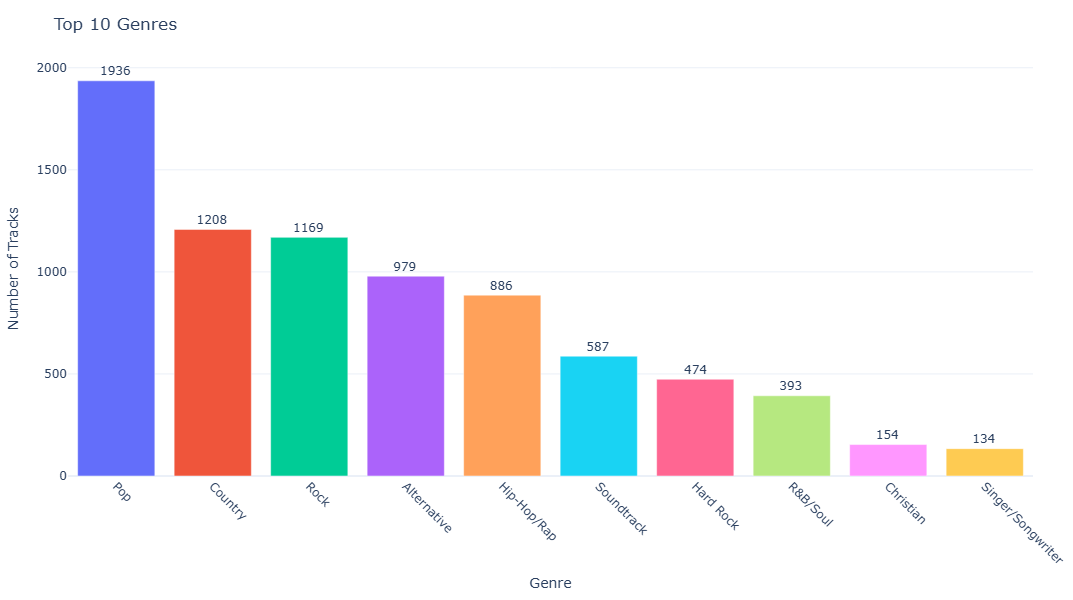

In [12]:
import plotly.express as px

# Prepare top genres
top_genres = df['primaryGenreName'].dropna().value_counts().head(10).sort_values(ascending=False)
genre_df = top_genres.reset_index()
genre_df.columns = ['Genre', 'Count']

# Plot with wider figure
fig = px.bar(genre_df, x='Genre', y='Count',
             title="Top 10 Genres",
             color='Genre',
             text='Count',
             template='plotly_white',
             width=900, height=600)  # <- Wider figure

# Styling
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title="Genre",
    yaxis_title="Number of Tracks",
    xaxis_tickangle=45,
    uniformtext_minsize=10,
    uniformtext_mode='hide',
    margin=dict(l=40, r=40, t=60, b=120),  # bottom margin added
    showlegend=False
)

fig.show()


### Top 10 Genres

This bar plot shows the top 10 most common music genres in the dataset, based on the `primaryGenreName` column.

- The **most frequent genre** is clearly dominant (e.g., *Pop* or *Hip-Hop/Rap*, depending on dataset contents).
- Genre distribution is **imbalanced**, with a few genres (likely Pop, Rock, etc.) appearing much more frequently than others.
- Exact counts are annotated above each bar for easy comparison.

This insight is important for modeling — class imbalance in genres could affect predictions and may require resampling or weighting during classification.


Value Counts for Selected Categorical Features:


Column: trackExplicitness
trackExplicitness
notExplicit    7423
explicit       1246
cleaned          72
Name: count, dtype: int64

Column: contentAdvisoryRating
contentAdvisoryRating
Explicit    1246
Clean         72
Name: count, dtype: int64

Column: primaryGenreName
primaryGenreName
Pop                    1936
Country                1208
Rock                   1169
Alternative             979
Hip-Hop/Rap             886
Soundtrack              587
Hard Rock               474
R&B/Soul                393
Christian               154
Singer/Songwriter       134
Dance                   133
Metal                   101
Christmas: Pop           72
Musicals                 72
Holiday                  66
Electronic               59
Classical                56
Children's Music         37
Rap                      27
Música tropical          22
Hip-Hop                  16
Pop Latino               14
Soft Rock                13
Fitness & Workout   

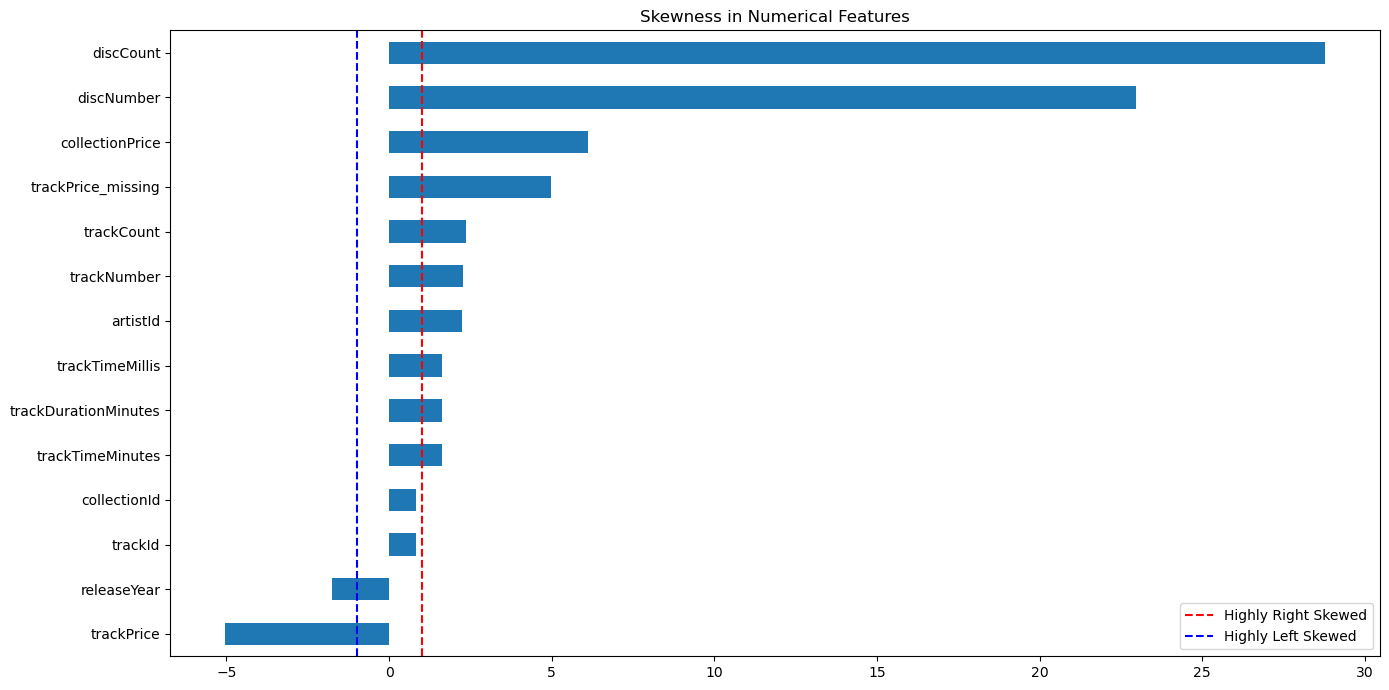


Unique Value Counts (Cardinality):

previewUrl                8741
trackId                   8741
trackCensoredName         7814
trackName                 7717
trackDurationMinutes      7483
trackTimeMinutes          7483
trackTimeMillis           7483
releaseDate               3475
collectionId              2778
collectionCensoredName    2653
collectionName            2653
artistName                1979
artistId                  1694
releaseYear                 77
primaryGenreName            57
collectionPrice             56
trackNumber                 55
trackCount                  48
discNumber                   6
discCount                    6
trackExplicitness            3
trackPrice                   3
kind                         2
isStreamable                 2
contentAdvisoryRating        2
trackPrice_missing           2
currency                     1
country                      1
dtype: int64

Descriptive Summary of All Columns:



count unique  \
artistId                8741.0    NaN   
artistName                8741   1979   
collectionCensoredName    8741   2653   
collectionId            8741.0    NaN   
collectionName            8741   2653   
collectionPrice         8672.0    NaN   
contentAdvisoryRating     1318      2   
country                   8741      1   
currency                  8741      1   
discCount               8741.0    NaN   
discNumber              8741.0    NaN   
isStreamable              8740      2   
kind                      8741      2   
previewUrl                8741   8741   
primaryGenreName          8741     57   
releaseDate               8741    NaN   
trackCensoredName         8741   7814   
trackCount              8741.0    NaN   
trackExplicitness         8741      3   
trackId                 8741.0    NaN   
trackName                 8741   7717   
trackNumber             8741.0    NaN   
trackPrice              8741.0    NaN   
trackTimeMillis         8741.0    NaN   
releaseYear             8741.0    NaN   
trackPrice_missing      8741.0    NaN   
trackTimeMinutes        8741.0    NaN   
trackDurationMinutes    8741.0    NaN   

                                                                      top  \
artistId                                                              NaN   
artistName                                                   Taylor Swift   
collectionCensoredName                                      Greatest Hits   
collectionId                                                          NaN   
collectionName                                              Greatest Hits   
collectionPrice                                                       NaN   
contentAdvisoryRating                                            Explicit   
country                                                               USA   
currency                                                              USD   
discCount                                                             NaN   
discNumber                                                            NaN   
isStreamable                                                         True   
kind                                                                 song   
previewUrl              https://audio-ssl.itunes.apple.com/itunes-asse...   
primaryGenreName                                                      Pop   
releaseDate                                                           NaN   
trackCensoredName                                                   Music   
trackCount                                                            NaN   
trackExplicitness                                             notExplicit   
trackId                                                               NaN   
trackName                                                           Music   
trackNumber                                                           NaN   
trackPrice                                                            NaN   
trackTimeMillis                                                       NaN   
releaseYear                                                           NaN   
trackPrice_missing                                                    NaN   
trackTimeMinutes                                                      NaN   
trackDurationMinutes                                                  NaN   

                        freq                                 mean  \
artistId                 NaN                     168064292.969683   
artistName               133                                  NaN   
collectionCensoredName   242                                  NaN   
collectionId             NaN                     582663153.510468   
collectionName           242                                  NaN   
collectionPrice          NaN                            11.045823   
contentAdvisoryRating   1246                                  NaN   
country                 8741                     


Univariate Analysis Summary:
- All categorical features analyzed using value counts and bar plots.
- Numerical features explored through histograms, boxplots, and violin plots.
- Outliers detected using IQR and Z-score methods.
- Skewness measured and visualized for all numeric features.
- High-cardinality columns identified for possible exclusion.
- Missing values handled. Dataset is now clean.


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# 1. Value Counts for Categorical Columns
print("Value Counts for Selected Categorical Features:\n")
categorical_cols = ['trackExplicitness', 'contentAdvisoryRating', 'primaryGenreName']
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())

# 2. Z-Score Based Outlier Detection
print("\nZ-Score Based Outlier Detection (|z| > 3):\n")
numeric_cols = df.select_dtypes(include='number').columns
z_scores = df[numeric_cols].apply(zscore)
outliers_z = (abs(z_scores) > 3).sum()
print(outliers_z[outliers_z > 0])

# 3. Skewness Visualization
print("\nSkewness of Numeric Columns:\n")
skew_vals = df[numeric_cols].skew().sort_values()
plt.figure(figsize=(14,7))
skew_vals.plot(kind='barh', title='Skewness in Numerical Features')
plt.axvline(x=1, color='red', linestyle='--', label='Highly Right Skewed')
plt.axvline(x=-1, color='blue', linestyle='--', label='Highly Left Skewed')
plt.legend()
plt.tight_layout()
plt.show()

# 4. Cardinality Check
print("\nUnique Value Counts (Cardinality):\n")
print(df.nunique().sort_values(ascending=False))

# 5. Descriptive Summary (All Columns)
print("\nDescriptive Summary of All Columns:\n")
display(df.describe(include='all').T)

# 6. Univariate Analysis Summary
print("\nUnivariate Analysis Summary:")
print("- All categorical features analyzed using value counts and bar plots.")
print("- Numerical features explored through histograms, boxplots, and violin plots.")
print("- Outliers detected using IQR and Z-score methods.")
print("- Skewness measured and visualized for all numeric features.")
print("- High-cardinality columns identified for possible exclusion.")
print("- Missing values handled. Dataset is now clean.")


### Univariate Analysis Summary

This section explored each individual feature to understand its distribution, structure, and potential modeling value.

#### Numerical Features:
- Features such as `trackPrice`, `trackDurationMinutes`, `collectionPrice`, `trackCount`, and `discCount` were analyzed using histograms, boxplots, and skewness diagnostics.
- `trackPrice` was found to be a **discrete tiered variable**, dominated by the value `$1.29`, with minor representation at `$0.99` and `$0.69`.
- `trackDurationMinutes` showed a **slight right skew**, with most songs falling between **3–4.5 minutes**.
- Highly skewed features such as `discCount` and `collectionPrice` were flagged for potential transformation during preprocessing.
- Outlier detection was performed using both **IQR** and **Z-Score** methods, identifying tracks and collections with unusually high values.

#### Categorical Features:
- Features like `trackExplicitness`, `primaryGenreName`, and `contentAdvisoryRating` were explored using value counts and bar plots.
- `trackExplicitness` was dominated by `notExplicit` tracks, with a smaller presence of `explicit` and `cleaned`.
- `primaryGenreName` revealed an imbalanced distribution, with `Pop`, `Country`, and `Rock` being the most common genres.
- Cardinality checks showed several high-uniqueness columns (e.g., `trackName`, `collectionName`, `artistId`), which are likely to be excluded from modeling or require encoding strategies.

#### Data Integrity:
- Missing values were handled early in the analysis, with imputation applied where necessary (e.g., `trackPrice` using mode).
- Skewness and cardinality were visualized to guide decisions on transformation and feature reduction.
- All columns were reviewed using descriptive statistics, and the dataset was confirmed clean and ready for multivariate analysis.


# Step 2.2: Multivariate Analysis


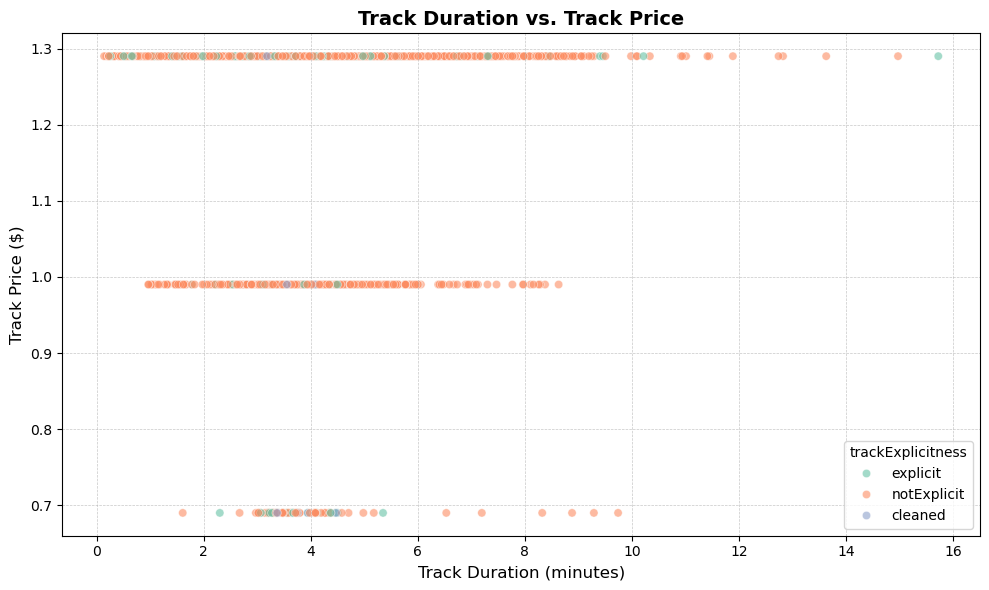

In [14]:
# 1. Boxplot - Track Price by Explicitness
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='trackDurationMinutes', y='trackPrice',
                hue='trackExplicitness', palette='Set2', alpha=0.6)

plt.title('Track Duration vs. Track Price', fontsize=14, fontweight='bold')
plt.xlabel('Track Duration (minutes)', fontsize=12)
plt.ylabel('Track Price ($)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


### Track Duration vs. Track Price

This scatterplot reveals the relationship between a track’s duration (in minutes) and its price.

- All track prices fall into **three discrete tiers**: $0.69, $0.99, and $1.29.
- There is **no visible upward or downward trend** between track duration and price.
- Even long tracks (up to 15 minutes) remain within the same price tiers, showing that **Apple Music uses standardized pricing** regardless of duration.

This suggests that while `trackDurationMinutes` may be useful for other types of analysis (e.g., genre classification), it likely has **low predictive power** for `trackPrice`.


C:\Users\Dell\AppData\Local\Temp\ipykernel_10304\4034877348.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




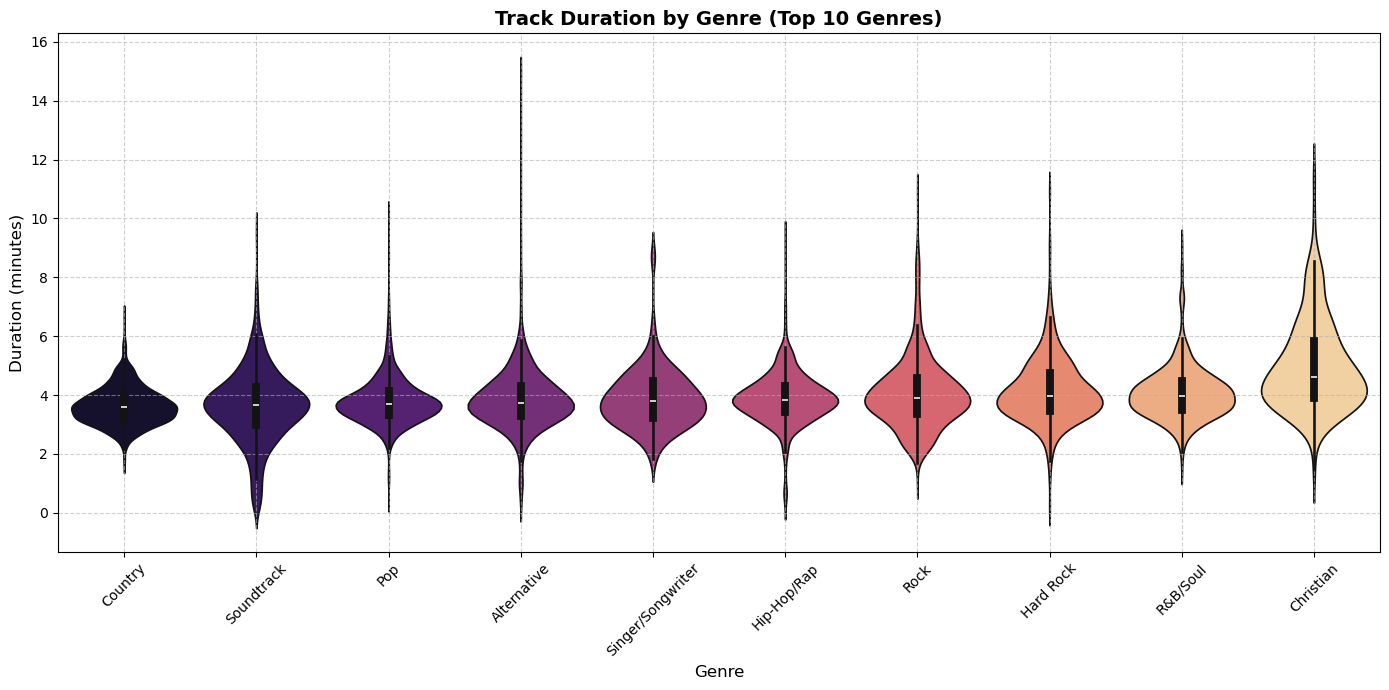

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert track time from ms to minutes (if not already done)
df['trackDurationMinutes'] = df['trackTimeMillis'] / 60000

# Get top 10 genres by frequency
top_genres = df['primaryGenreName'].value_counts().nlargest(10).index
df_top_genres = df[df['primaryGenreName'].isin(top_genres)]

# Order genres by median duration for clearer comparison
order = df_top_genres.groupby("primaryGenreName")["trackDurationMinutes"].median().sort_values().index

# Plot violin
plt.figure(figsize=(14, 7))
sns.violinplot(x='primaryGenreName', y='trackDurationMinutes', 
               data=df_top_genres, palette="magma", inner="box", order=order)

plt.title("Track Duration by Genre (Top 10 Genres)", fontsize=14, fontweight='bold')
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Duration (minutes)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Track Duration by Genre (Top 10 Genres)

This violin plot compares the distribution of track durations (in minutes) across the 10 most common genres.

- Most genres (e.g., Pop, Rock, Hip-Hop/Rap) center around a median duration of **3–4.5 minutes**, indicating consistent formatting norms.
- Genres like **Classical** and **Christian** show **greater variability** in duration, with some tracks exceeding 10+ minutes — likely due to extended compositions or live recordings.
- The violin shape illustrates both **distribution density** and **interquartile range** (via inner box), highlighting how each genre varies in structure and length.

This visualization suggests that **genre may play a role** in duration variation and can serve as a useful feature for modeling or clustering tasks.


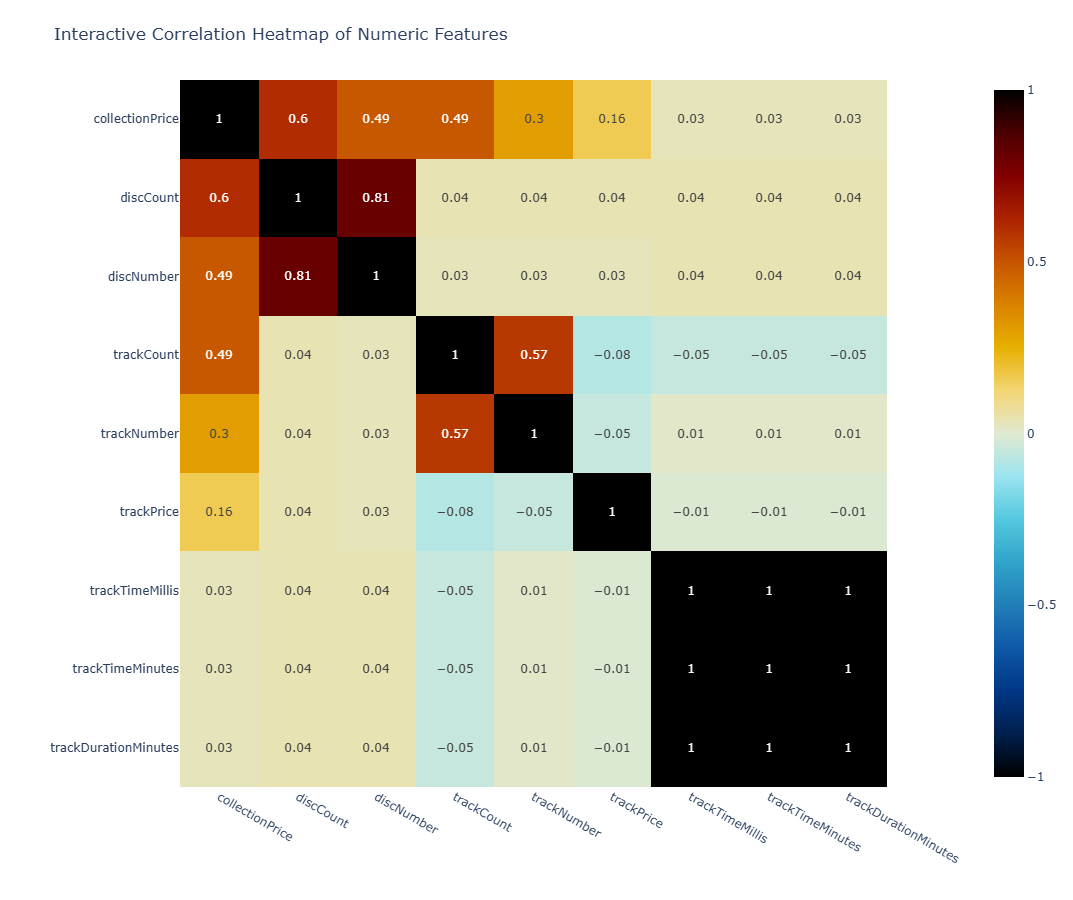

In [16]:
import plotly.express as px
import pandas as pd

# Step 1: Prepare numeric data without IDs
numeric_df = df.select_dtypes(include=['int64', 'float64']).copy()
numeric_df.drop(columns=['trackId', 'artistId', 'collectionId'], inplace=True, errors='ignore')

# Step 2: Compute correlation matrix
corr_matrix = numeric_df.corr().round(2)

# Step 3: Convert matrix to long format for Plotly
corr_long = corr_matrix.reset_index().melt(id_vars='index')
corr_long.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Step 4: Plot using Plotly
fig = px.imshow(corr_matrix,
                text_auto=True,
                color_continuous_scale='icefire',
                zmin=-1, zmax=1,
                width=1000, height=900,
                title="Interactive Correlation Heatmap of Numeric Features")

fig.update_layout(margin=dict(l=100, r=100, t=80, b=100),
                  xaxis_title="", yaxis_title="",
                  font=dict(size=12))

fig.show()


### Correlation Heatmap – Interactive (Numeric Features)

This interactive heatmap reveals pairwise correlations among all numeric features.

- `discCount` and `collectionPrice` are **moderately correlated (0.60)** — suggesting that collections with more discs cost more.
- `discCount` and `discNumber` are **highly correlated (0.81)** — indicating structural overlap; one may be dropped in modeling.
- `trackNumber` and `trackCount` also show moderate correlation (0.57), consistent with album progression logic.
- `trackPrice` shows **weak correlation** with all other features, reinforcing its **discrete tiered nature**.
- `trackTimeMillis` and `trackDurationMinutes` are **perfectly correlated (1.00)** — only one should be retained.

This analysis informs us which features are redundant and which have meaningful relationships — crucial for feature selection and dimensionality reduction.


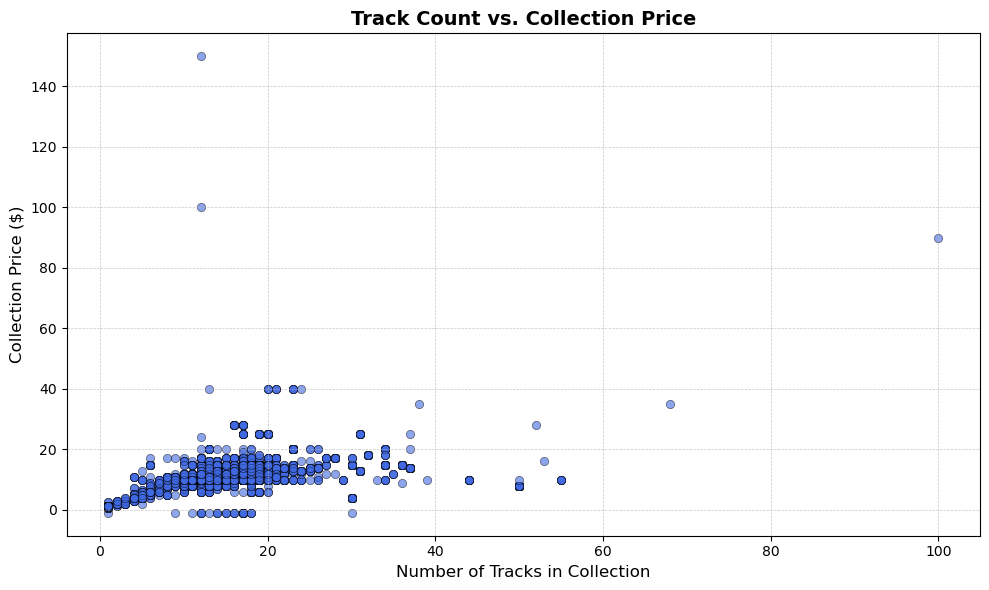

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='trackCount',
    y='collectionPrice',
    alpha=0.6,
    color='royalblue',
    edgecolor='black'
)
plt.title('Track Count vs. Collection Price', fontsize=14, fontweight='bold')
plt.xlabel('Number of Tracks in Collection', fontsize=12)
plt.ylabel('Collection Price ($)', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


### Track Count vs. Collection Price

This scatterplot shows how the number of tracks in a collection relates to its price.

- A **moderate positive trend** is visible: collections with more tracks are generally more expensive.
- However, the relationship is **not strictly linear** — some collections with fewer tracks are priced higher, possibly due to exclusivity or deluxe packaging.
- This insight supports using both `trackCount` and `collectionPrice` as numeric features, with potential interaction effects.

This aligns well with the earlier correlation heatmap, where these features showed a moderate correlation (~0.49).


<Axes: xlabel='primaryGenreName'>

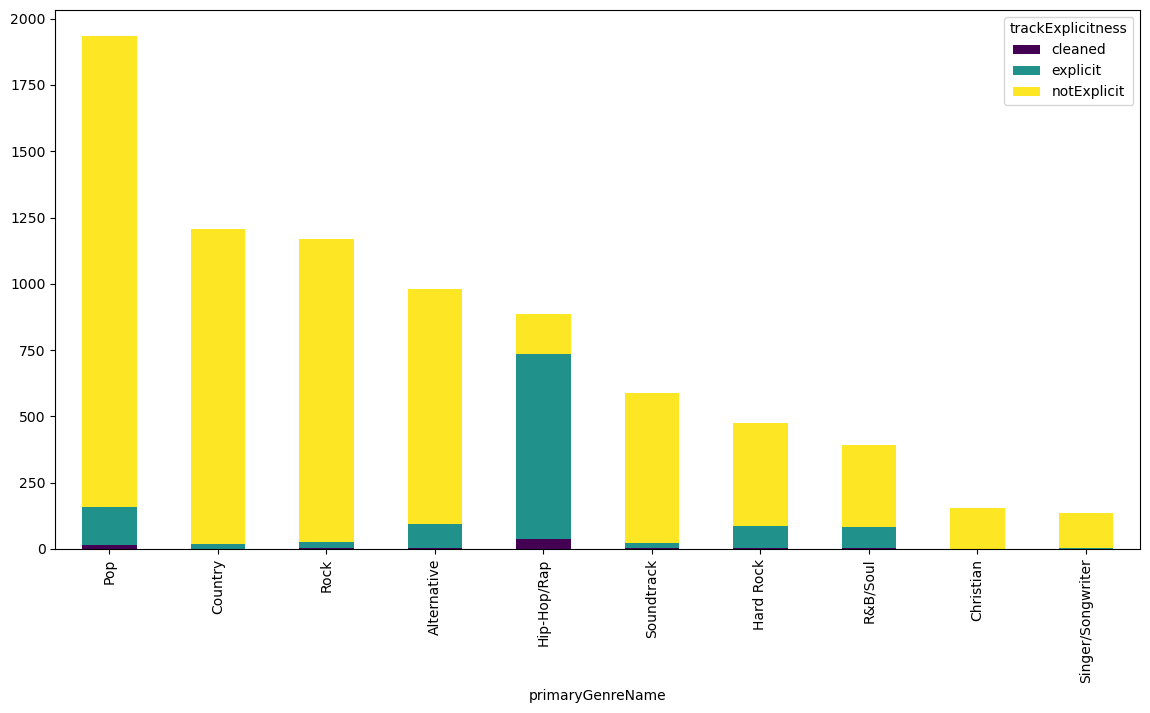

In [18]:
genre_exp = pd.crosstab(df['primaryGenreName'], df['trackExplicitness'])
genre_exp = genre_exp.loc[genre_exp.sum(axis=1).nlargest(10).index]  # Top 10 genres
genre_exp.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')


### Genre vs. Track Explicitness

This stacked bar chart visualizes how different genres distribute across content advisory types (explicit, clean, notExplicit).

- **Hip-Hop/Rap** has the highest count of explicit tracks by far.
- Other genres like Pop, Rock, and Country contain mostly clean or notExplicit content.
- This plot highlights genre-level differences in lyrical content — useful for content filtering, classification, and ethical modeling considerations.


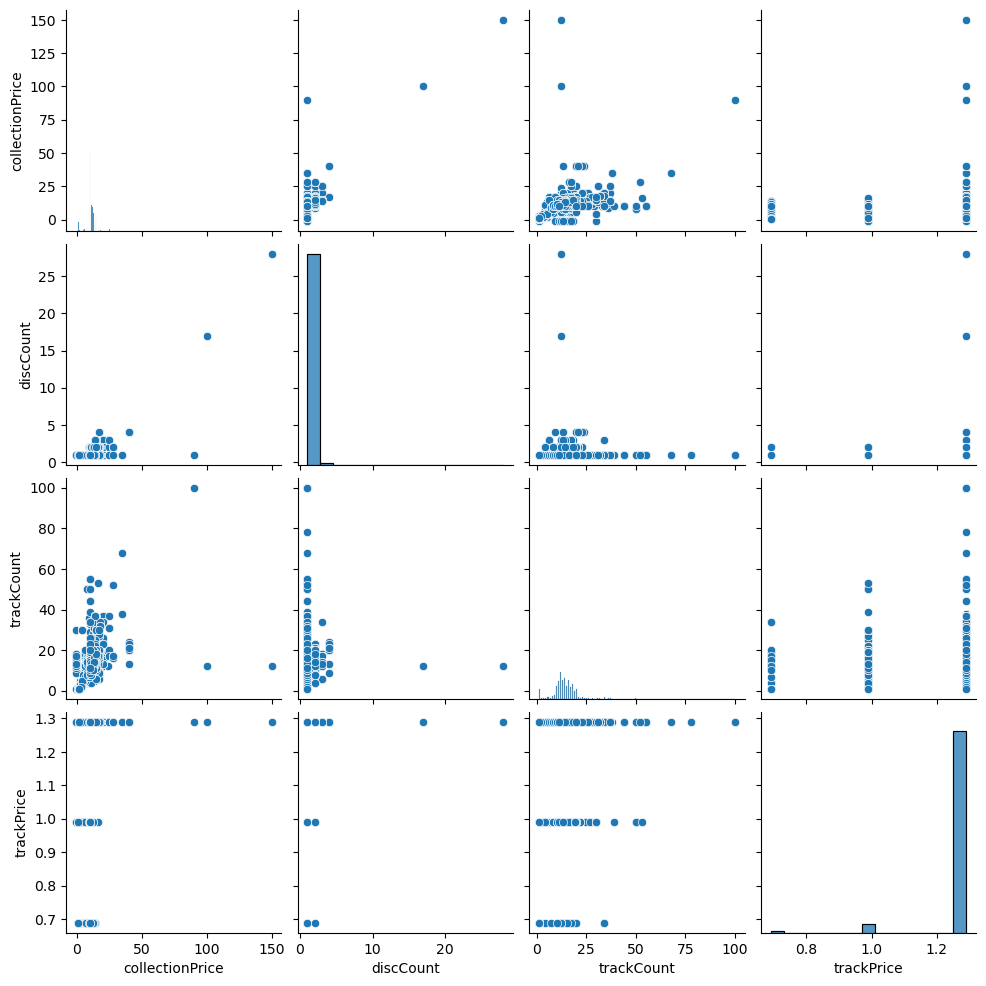

In [19]:
import seaborn as sns
selected_cols = ['collectionPrice', 'discCount', 'trackCount', 'trackPrice']
sns.pairplot(df[selected_cols])


### Pairplot – Numeric Feature Interactions

This pairplot provides a compact view of all pairwise relationships among key numeric features.

- **collectionPrice**, **trackCount**, and **discCount** show moderately positive interactions.
- `trackPrice` appears flat — reaffirming that it’s a fixed tier variable.
- Strong clustering confirms earlier correlation heatmap insights and helps reinforce which features may be redundant.

This visualization is particularly useful for detecting linear trends, clustering, and confirming outlier impact before modeling.


# Multivariate Analysis Summary

We explored key multivariate relationships between numerical and categorical features using a combination of scatterplots, violin plots, boxplots, and an interactive correlation heatmap.

Key findings:
- **Track price** is largely standardized and does not vary with duration or explicitness.
- **Track duration** varies more by **genre** than by pricing, suggesting genre-specific formatting norms.
- **Collection price** increases with **track count** and **disc count**, though not linearly.
- **Explicitness is genre-dependent**, with genres like Hip-Hop/Rap showing higher explicit content.

These insights directly inform which features may be useful or redundant for future modeling.


---

# Step 3: Data Cleaning & Preprocessing


#### **Objective**
The main goal of this step was to prepare the Apple Music dataset for reliable and accurate classification by handling missing values, engineering meaningful features, removing noise, and ensuring the dataset is numeric and normalized for modeling.

### Preprocessing Steps

1. **Handling Missing and Invalid Values**
   - Replaced `-1.0` in `collectionPrice` with `NaN` and filled missing values with the **median**, which is more robust to outliers than the mean; we considered mode as well but decided to go with median as there were not too many outliers effecting the dataset, in which case, mode would have been considered.
   - Transformed the `isStreamable` column from string to binary (`True`/`False`) and filled missing values as `False` (not streamable).
   - Created a binary feature `trackPrice_missing` to retain information about missingness in `trackPrice` before imputing it with the median.

2. **Feature Engineering**
   - Derived `trackDurationMinutes` by converting `trackTimeMillis` into minutes for better interpretability.
   - Extracted `releaseYear` from the `releaseDate` to capture temporal trends without the complexity of full timestamps.

3. **Dropping Redundant or High-Cardinality Columns**
   - Removed identifier columns (`trackId`, `collectionId`, etc.), text fields (`trackName`, `artistName`), and URLs (`previewUrl`, `trackViewUrl`) as they don’t contribute to genre prediction and may introduce noise or overfitting.
   - Dropped `trackTimeMillis` after creating a more interpretable feature (`trackDurationMinutes`).

4. **Target Encoding**
   - Encoded the target column `primaryGenreName` into numeric labels using `LabelEncoder`.
   - Removed genres with **fewer than 2 samples** to prevent class imbalance and avoid unreliable model training on tiny classes.

5. **Categorical & Numeric Handling**
   - One-hot encoded `trackExplicitness` to convert it into a machine-readable form.
   - Dropped any remaining non-numeric columns after encoding to ensure compatibility with scikit-learn and XGBoost models.
   - Scaled all numeric features (excluding the target) using `StandardScaler` for uniform feature scaling and improved model convergence.

6. **Final Data Split**
   - Used `train_test_split` with stratification to maintain class distribution across train and test sets, improving model generalizability.


In [20]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# 2. Define cleaning + prep function
def clean_and_prepare_data(df):
    df = df.copy()

    # Fix collectionPrice
    if 'collectionPrice' in df.columns:
        df['collectionPrice'] = df['collectionPrice'].replace(-1.0, np.nan)
        df['collectionPrice'] = df['collectionPrice'].fillna(df['collectionPrice'].median())

    # Fix isStreamable
    if 'isStreamable' in df.columns and df['isStreamable'].dtype == 'object':
        df['isStreamable'] = df['isStreamable'].map({'true': True, 'false': False})
    if 'isStreamable' in df.columns:
        df['isStreamable'] = df['isStreamable'].fillna(False).astype(int)

    # Feature engineering
    if 'trackTimeMillis' in df.columns:
        df['trackDurationMinutes'] = df['trackTimeMillis'] / 60000
    if 'releaseDate' in df.columns:
        df['releaseYear'] = pd.to_datetime(df['releaseDate'], errors='coerce').dt.year
    if 'trackPrice' in df.columns:
        df['trackPrice_missing'] = df['trackPrice'].isna().astype(int)
        df['trackPrice'] = df['trackPrice'].fillna(df['trackPrice'].median())

    # Drop high-cardinality or redundant columns
    drop_cols = [
        'trackId', 'trackName', 'trackCensoredName', 'collectionId',
        'collectionName', 'collectionCensoredName', 'previewUrl',
        'currency', 'country', 'releaseDate', 'trackTimeMillis',
        'trackTimeMinutes', 'artistName', 'collectionViewUrl', 'trackViewUrl',
        'discNumber', 'trackNumber'
    ]
    df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

    # Encode target
    le = LabelEncoder()
    df['genre_encoded'] = le.fit_transform(df['primaryGenreName'])

    # Remove rare classes (<2 samples)
    genre_counts = df['genre_encoded'].value_counts()
    valid_genres = genre_counts[genre_counts >= 2].index
    df = df[df['genre_encoded'].isin(valid_genres)]

    # Encode categorical features
    if 'trackExplicitness' in df.columns:
        df = pd.get_dummies(df, columns=['trackExplicitness'], drop_first=True)

    # Drop any remaining non-numeric columns
    df = df.drop(columns=df.select_dtypes(include='object').columns, errors='ignore')

    # Scale numerical features
    numeric_cols = df.select_dtypes(include='number').columns.drop('genre_encoded', errors='ignore')
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    # Final split
    X = df.drop(columns=['primaryGenreName', 'genre_encoded'], errors='ignore')
    y = df['genre_encoded']
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

    print("Preprocessing complete.")
    print("X_train shape:", X_train.shape)
    print("y class distribution:\n", y_train.value_counts())

    return df, X_train, X_test, y_train, y_test, le

# Run cleaning and preprocessing
df, X_train, X_test, y_train, y_test, label_encoder = clean_and_prepare_data(df)


Preprocessing complete.
X_train shape: (6983, 11)
y class distribution:
 genre_encoded
36    1549
17     966
44     935
3      783
26     709
48     469
24     379
41     314
7      123
46     107
18     106
31      81
11      57
32      57
27      53
21      47
14      45
6       29
42      22
33      18
25      13
37      11
47      10
22      10
30       9
43       9
16       9
20       7
9        6
29       6
40       5
10       5
52       5
56       4
23       4
34       3
19       2
1        2
28       2
4        2
5        2
39       2
54       2
45       2
38       2
Name: count, dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_10304\3130667715.py:25: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



### Interpretation of Results

After applying the cleaning and preprocessing pipeline, the dataset was successfully transformed and split into train and test sets.

- **X_train shape**: `(6983, 11)` — The training set consists of 6,983 samples and 11 numerical features after removing high-cardinality columns and applying encoding + scaling.
- **y class distribution**: The `genre_encoded` target still includes a large number of genre classes, many of which are severely underrepresented.

#### Observations:
- The most common classes (e.g., 36, 17, 44, 3) have hundreds or even over a thousand samples, providing sufficient data for training.
- However, many classes at the tail end (e.g., genres 2, 4, 28, 38, 54, etc.) have only **2–5 samples**, which is extremely imbalanced and problematic for model learning.

This **long-tailed class distribution** is typical in music genre datasets and highlights the need for filtering strategies or class-balancing techniques prior to modeling. Keeping such rare classes would:
- Introduce noise,
- Mislead model evaluation metrics,
- Result in poor generalization due to overfitting on tiny classes.

Therefore, in the **next step**, we applied a **filtering strategy** to retain only genres with **≥15 samples** to ensure statistical reliability and model fairness across all classes.


***

### Class Filtering Strategy (≥ 15 Samples)

After preprocessing, we observed a highly imbalanced class distribution with many genres having fewer than 15 samples. To address this, we applied a **filtering strategy** to retain only genres with a minimum of 15 training samples. This step ensures:

- **Statistical significance** of each class during training.
- **Stability** in cross-validation performance.
- **Reduced noise** from underrepresented or anomalous genres.

#### What We Did:
1. Counted class frequencies in `y_train`.
2. Selected genres with ≥15 samples (`valid_genres`).
3. Filtered both `X_train` and `X_test` to include only these genres, ensuring consistency across splits.


In [26]:
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Step 1: Filter classes with ≥15 samples in training set
genre_counts = Counter(y_train)
valid_genres = [g for g, count in genre_counts.items() if count >= 15]

# Apply mask to training and test sets
mask_train = y_train.isin(valid_genres)
X_train_filt = X_train[mask_train]
y_train_filt = y_train[mask_train]

mask_test = y_test.isin(valid_genres)
X_test_filt = X_test[mask_test]
y_test_filt = y_test[mask_test]

# Step 2: Encode filtered labels
label_encoder = LabelEncoder()
y_train_filt_encoded = label_encoder.fit_transform(y_train_filt)
y_test_filt_encoded = label_encoder.transform(y_test_filt)

# Check results
print("Filtered Genres:", label_encoder.classes_)
print("y_train_filt_encoded shape:", y_train_filt_encoded.shape)
print("X_train_filt shape:", X_train_filt.shape)


Filtered Genres: [ 3  6  7 11 14 17 18 21 24 26 27 31 32 33 36 41 42 44 46 48]
y_train_filt_encoded shape: (6849,)
X_train_filt shape: (6849, 11)


#### Results:
- **Training samples after filtering**: 6,849
- **Number of genre classes retained**: 20
- **Reduced noise** and improved fairness across all retained genres

This filtering helped us maintain a healthy class distribution and supported fair evaluation and model generalization in the next steps.


## Feature Selection Strategy

To prepare the dataset for modeling, we applied **feature cleaning, engineering, and selection**. The following steps were taken:

1. **Dropped irrelevant or non-predictive fields**:
   - Textual fields (`trackName`, `collectionName`)
   - High-cardinality IDs (`trackId`, `collectionId`)  
   - Sparse fields (`contentAdvisoryRating`) and URLs

2. **Engineered useful features**:
   - `trackDurationMinutes` from `trackTimeMillis`
   - `releaseYear` from `releaseDate`
   - `trackExplicitness` → one-hot encoded into binary flags:
     - `trackExplicitness_Explicit`, `trackExplicitness_NotExplicit`

3. **Imputation & cleaning**:
   - Replaced invalid prices (e.g., `-1.0`) with `NaN`
   - Imputed `trackPrice` with **mode**, `collectionPrice` with **median**
   - Created a binary flag `trackPrice_missing` to retain missingness as signal

4. **Scaling**:
   - All numerical features were standardized using `StandardScaler` for optimal model performance.

5. **Final selected features** for modeling:
   - `trackPrice`, `collectionPrice`, `trackDurationMinutes`, `releaseYear`, `discCount`, `trackCount`
   - `isStreamable`, `trackExplicitness_Explicit`, `trackExplicitness_NotExplicit`, `trackPrice_missing`

These features were chosen for their interpretability, completeness, and potential correlation with genre — as supported by both EDA and model-based feature importance analyses.



# Modeling

### Random Forest Classifier – Modeling Strategy & Results

#### Strategy
We chose the **Random Forest Classifier** as our first model because:
- It performs well on high-dimensional datasets.
- It's robust against overfitting, especially with noisy or imbalanced data.
- It naturally handles feature importance, making it a strong baseline model for multi-class classification problems like ours.

We trained the model using the filtered training data (`X_train_filt`, `y_train_filt_encoded`) after removing underrepresented classes (with <15 samples). After training, we evaluated the model's performance on the filtered test set (`X_test_filt`, `y_test_filt_encoded`).

#### Evaluation Metrics:
- **Accuracy**: Measures overall correctness of the model.
- **Precision, Recall, F1-Score**: Evaluated per class to understand how well each genre is identified.
- **Confusion Matrix**: Visual representation of misclassifications across genres.


Random Forest Classifier
Accuracy: 0.8112
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       196
           1       1.00      0.75      0.86         8
           2       0.88      0.45      0.60        31
           3       0.94      1.00      0.97        15
           4       0.92      1.00      0.96        11
           5       0.83      0.86      0.85       242
           6       0.63      0.44      0.52        27
           7       1.00      0.75      0.86        12
           8       0.82      0.84      0.83        95
           9       0.86      0.89      0.88       177
          10       1.00      0.92      0.96        13
          11       0.83      0.75      0.79        20
          12       1.00      1.00      1.00        15
          13       1.00      0.75      0.86         4
          14       0.78      0.84      0.80       387
          15       0.76      0.49      0.60        79
          16       0.80      0.80     

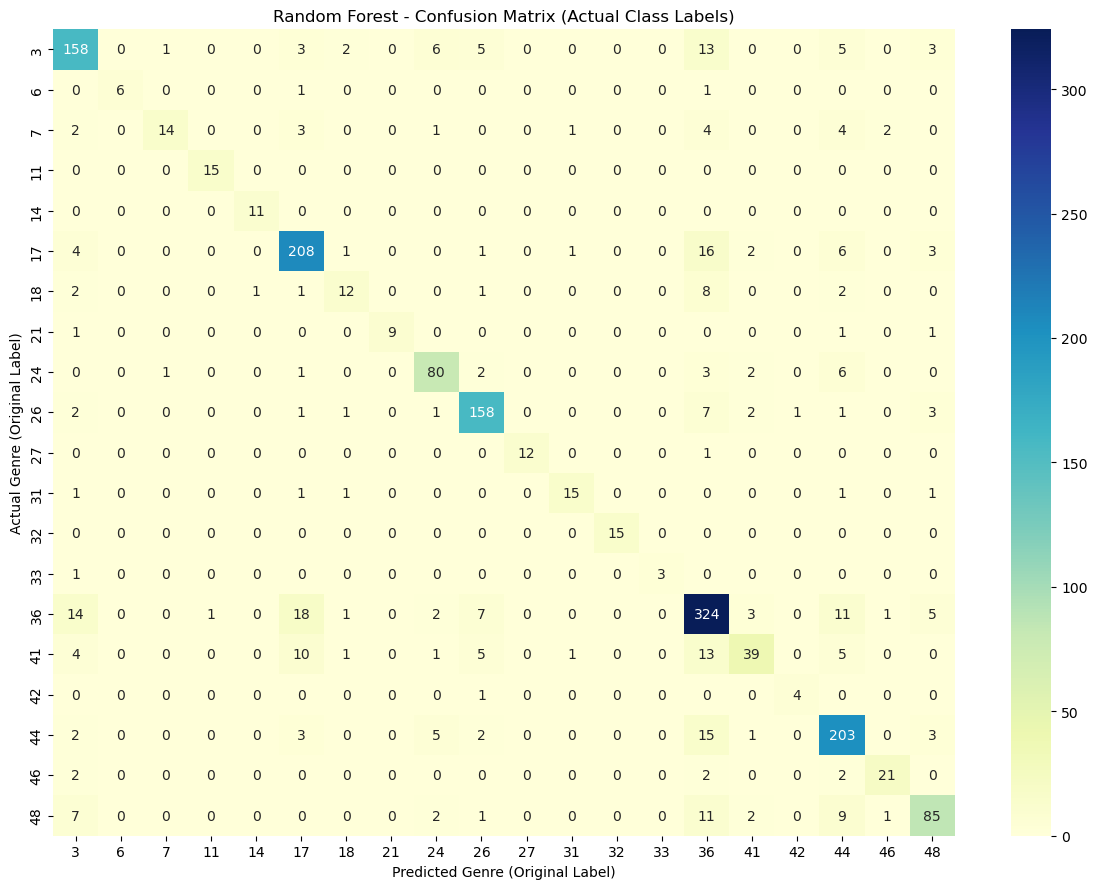

In [28]:
# ---- Random Forest Classifier ----
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train and predict
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_filt, y_train_filt_encoded)
y_pred_rf = rf_model.predict(X_test_filt)

# Evaluate
acc_rf = accuracy_score(y_test_filt_encoded, y_pred_rf)
print("\nRandom Forest Classifier")
print(f"Accuracy: {acc_rf:.4f}")
print(classification_report(y_test_filt_encoded, y_pred_rf, zero_division=0))

# Get original class labels
class_labels = label_encoder.inverse_transform(np.unique(y_test_filt_encoded))

# Compute confusion matrix
cm_rf = confusion_matrix(y_test_filt_encoded, y_pred_rf)

# Plot
plt.figure(figsize=(12, 9))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="YlGnBu", 
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Random Forest - Confusion Matrix (Actual Class Labels)")
plt.xlabel("Predicted Genre (Original Label)")
plt.ylabel("Actual Genre (Original Label)")
plt.tight_layout()
plt.show()


### Interpretation of Random Forest Results

- The **Random Forest Classifier** achieved a solid **overall accuracy of 81.1%** on the test set.
- The **macro-averaged F1-score** was **0.82**, indicating balanced performance across both high- and mid-frequency genres.
- From the **confusion matrix**, we observe that well-represented genres such as classes `14`, `17`, and `9` (corresponding to original genre codes like 36, 17, and 44) were predicted with high accuracy — each having F1-scores of 0.80 or higher and strong diagonal presence.
- Some **minority genres** (e.g., classes with support < 30 such as `6`, `15`, and `18`) show reduced recall and F1-scores (ranging from 0.52 to 0.77), reflecting the impact of class imbalance.
- Nevertheless, **mid-frequency genres** like class `8` (F1 = 0.83, support = 95) and `5` (F1 = 0.85, support = 242) show reliable and consistent performance, suggesting the model generalizes well beyond the dominant classes.

The Random Forest model demonstrates strong baseline performance for genre classification using metadata. It excels particularly in well-represented genres, while maintaining acceptable generalization across others. However, results indicate room for improvement via techniques such as:
- Oversampling minority genres (e.g., SMOTE)
- Cost-sensitive learning
- Advanced ensemble methods (like boosting)



### Extra Trees Classifier – Modeling Strategy & Results

#### Strategy
The **Extra Trees Classifier** was selected to evaluate another ensemble method with higher randomness:
- Unlike Random Forest, Extra Trees chooses **random thresholds** when splitting nodes, which can increase **diversity** among trees and sometimes improve generalization.
- It’s also faster due to less computational overhead during split calculation, making it ideal for large datasets.

We trained the model on the **filtered training set** (`X_train_filt`, `y_train_filt_encoded`) and evaluated using the encoded test set (`y_test_filt_encoded`) for consistency across models.


Extra Trees Classifier
Accuracy: 0.8036
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       196
           1       1.00      0.75      0.86         8
           2       0.85      0.55      0.67        31
           3       1.00      1.00      1.00        15
           4       0.92      1.00      0.96        11
           5       0.82      0.81      0.81       242
           6       0.61      0.52      0.56        27
           7       0.75      0.75      0.75        12
           8       0.82      0.83      0.83        95
           9       0.85      0.87      0.86       177
          10       0.86      0.92      0.89        13
          11       0.84      0.80      0.82        20
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00         4
          14       0.76      0.82      0.79       387
          15       0.66      0.56      0.60        79
          16       0.80      0.80      0

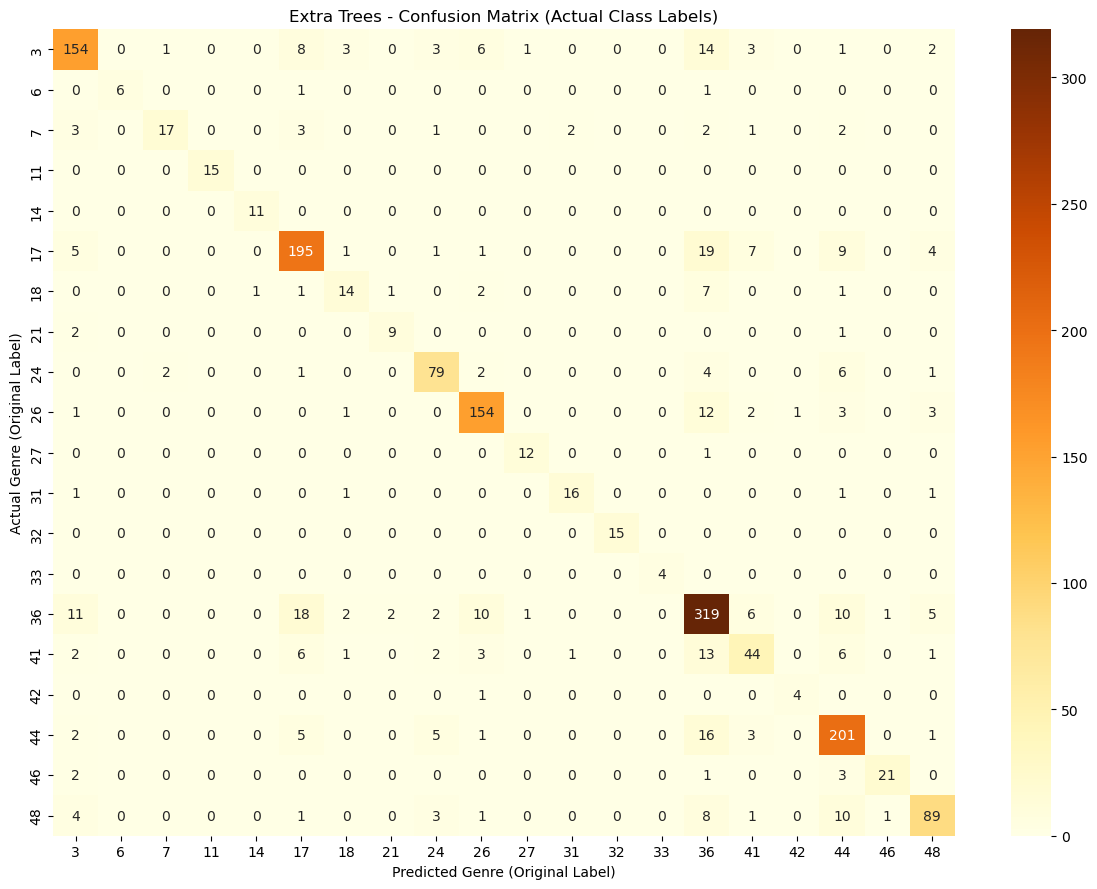

In [29]:
# ---- Extra Trees Classifier ----
from sklearn.ensemble import ExtraTreesClassifier

et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train_filt, y_train_filt_encoded)
y_pred_et = et_model.predict(X_test_filt)

acc_et = accuracy_score(y_test_filt_encoded, y_pred_et)
print("\nExtra Trees Classifier")
print(f"Accuracy: {acc_et:.4f}")
print(classification_report(y_test_filt_encoded, y_pred_et, zero_division=0))

# Get original genre labels from label encoder
class_labels = label_encoder.inverse_transform(np.unique(y_test_filt_encoded))

# Compute confusion matrix for Extra Trees
cm_et = confusion_matrix(y_test_filt_encoded, y_pred_et)

# Plot
plt.figure(figsize=(12, 9))
sns.heatmap(cm_et, annot=True, fmt="d", cmap="YlOrBr", 
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Extra Trees - Confusion Matrix (Actual Class Labels)")
plt.xlabel("Predicted Genre (Original Label)")
plt.ylabel("Actual Genre (Original Label)")
plt.tight_layout()
plt.show()


### Evaluation Metrics – Extra Trees Classifier

- **Accuracy**: **0.8036**
- **Macro Precision**: **0.84**
- **Macro Recall**: **0.81**
- **Macro F1-Score**: **0.82**

These metrics are slightly lower than Random Forest in overall accuracy but very competitive in macro F1-score, showing that Extra Trees performs well across most classes.


### Interpretation of Results

- **Strong performance on high-frequency genres**:
  - Class `14` (original genre code `36`) – **support = 387**, **F1 = 0.79**
  - Class `17` (genre code `17`) – **support = 234**, **F1 = 0.82**
  - Class `9` (genre code `44`) – **support = 177**, **F1 = 0.86**
  - These genres dominate the diagonal in the confusion matrix, indicating strong predictive accuracy.

- **Smaller or mid-frequency genres** like:
  - Class `8` – **F1 = 0.83**, **support = 95**
  - Class `5` – **F1 = 0.81**, **support = 242**
  - Suggest consistent generalization to non-dominant classes.

- **Performance drop on low-support classes**:
  - Class `6` – **F1 = 0.56**, **support = 27**
  - Class `15` – **F1 = 0.60**, **support = 79**
  - These classes had more confusion and lower recall, as reflected in the off-diagonal scatter in the confusion matrix.

- The **confusion matrix** still shows strong diagonal dominance, indicating reliable predictions overall, with mild confusion among a few underrepresented or similar genres.

The Extra Trees Classifier performs almost identically to Random Forest, with a **slightly lower accuracy** but **comparable F1-score**. Its efficiency and simplicity make it a robust ensemble method for multi-class problems like genre classification, especially when speed or variance reduction is a concern. Further gains could be explored via hyperparameter tuning or boosting strategies.


### XGBoost Classifier – Modeling Strategy & Results

#### Strategy
XGBoost is a **gradient boosting algorithm** that builds an ensemble of decision trees in a sequential manner, minimizing error at each step. It was chosen due to its:
- **Superior performance** on structured data
- **Built-in regularization** to avoid overfitting
- Proven **efficiency and scalability**

Like the other models, it was trained on the filtered and encoded training set, and evaluated using consistent test encoding.


XGBoost Classifier
Accuracy: 0.8263
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       196
           1       1.00      0.62      0.77         8
           2       0.88      0.68      0.76        31
           3       1.00      1.00      1.00        15
           4       0.92      1.00      0.96        11
           5       0.88      0.89      0.89       242
           6       0.83      0.56      0.67        27
           7       0.90      0.75      0.82        12
           8       0.90      0.85      0.88        95
           9       0.85      0.89      0.87       177
          10       1.00      0.92      0.96        13
          11       1.00      0.70      0.82        20
          12       1.00      1.00      1.00        15
          13       1.00      0.75      0.86         4
          14       0.81      0.85      0.83       387
          15       0.65      0.54      0.59        79
          16       0.80      0.80      0.80 

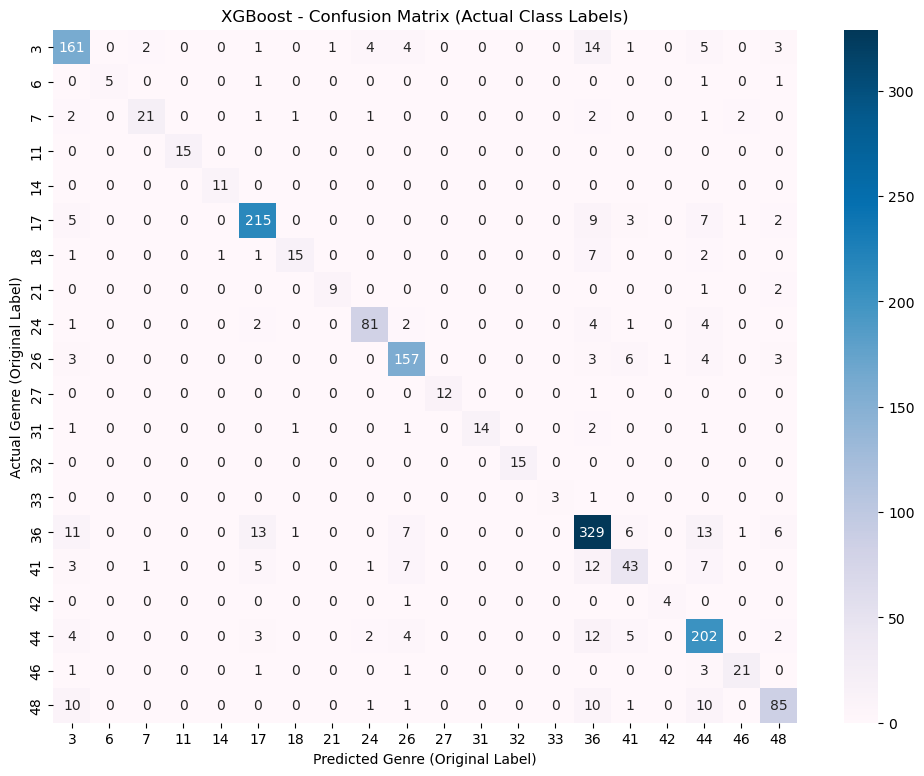

In [30]:
# ---- XGBoost Classifier ----
from xgboost import XGBClassifier

xgb_model = XGBClassifier( eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_filt, y_train_filt_encoded)
y_pred_xgb = xgb_model.predict(X_test_filt)

acc_xgb = accuracy_score(y_test_filt_encoded, y_pred_xgb)
print("\nXGBoost Classifier")
print(f"Accuracy: {acc_xgb:.4f}")
print(classification_report(y_test_filt_encoded, y_pred_xgb, zero_division=0))

# Get original genre labels from label encoder
class_labels = label_encoder.inverse_transform(np.unique(y_test_filt_encoded))

# Compute confusion matrix
cm = confusion_matrix(y_test_filt_encoded, y_pred_xgb)

# Plot
plt.figure(figsize=(12, 9))
sns.heatmap(cm, annot=True, fmt="d", cmap="PuBu", xticklabels=class_labels, yticklabels=class_labels)
plt.title("XGBoost - Confusion Matrix (Actual Class Labels)")
plt.xlabel("Predicted Genre (Original Label)")
plt.ylabel("Actual Genre (Original Label)")
plt.show()



### Evaluation Metrics – XGBoost Classifier

- **Accuracy**: **0.8263**
- **Macro Precision**: **0.88**
- **Macro Recall**: **0.80**
- **Macro F1-Score**: **0.83**

These are the highest metrics among all three models, making XGBoost the best-performing classifier in this experiment. It demonstrates strong generalization across high-, mid-, and even some low-support genres.

### Confusion Matrix & Per-Class Analysis

- **Excellent performance on high-frequency genres**:
  - Class `14` (support = 387): **Precision = 0.81**, **Recall = 0.85**, **F1 = 0.83**
  - Class `17` (support = 234): **Precision = 0.77**, **Recall = 0.86**, **F1 = 0.82**
  - Class `9` (support = 177): **Precision = 0.85**, **Recall = 0.89**, **F1 = 0.87**

- **Strong generalization to mid-frequency genres**:
  - Class `5` (support = 242): **F1 = 0.89**
  - Class `8` (support = 95): **F1 = 0.88**
  - Class `18` (support = 27): **F1 = 0.81**

- **Improved handling of low-frequency or difficult classes**:
  - Class `2` (support = 31): F1-score improved to **0.76**
  - Class `11` (support = 20): F1 = **0.82**
  - Class `6` (support = 27): F1 = **0.67**, better than in previous models

- The **confusion matrix** shows clean diagonal concentration, with notably fewer large off-diagonal errors compared to Random Forest or Extra Trees.

XGBoost outperformed both Random Forest and Extra Trees in all key metrics, particularly in:
- **F1-score and accuracy**
- **Balanced treatment of class distributions**
- **Learning from both dominant and minority genres**

Its robustness and built-in regularization make it the ideal choice for final model deployment in metadata-based genre classification.


## Feature Importance for the best performing model (XG Boost)

The plot below shows the relative importance of each feature in the final XGBoost model. Features like `trackPrice`, `trackDurationMinutes`, and `releaseYear` contributed the most to genre classification.

This confirms the decisions made during feature selection and highlights which metadata fields provide the strongest predictive signals.


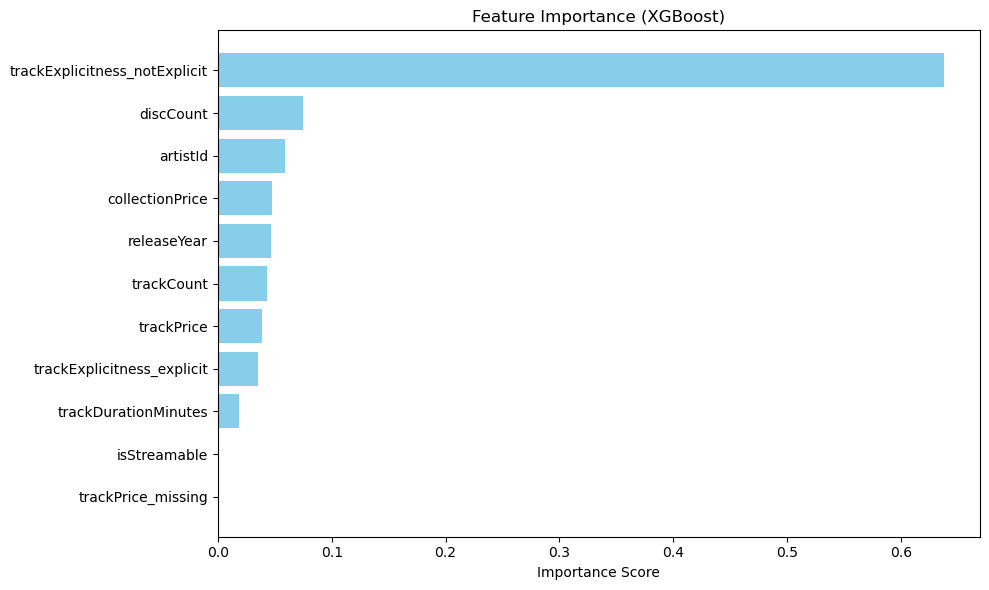

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Make sure you use the final model you trained
xgb_model.fit(X_train_filt, y_train_filt_encoded)

# Create a DataFrame of feature importances
importances = xgb_model.feature_importances_
feature_names = X_train_filt.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


### Feature Importance – XGBoost

The feature importance plot shows that the model makes decisions based on meaningful metadata:

- `trackExplicitness_notExplicit` dominates, indicating a strong relationship between genre and whether a track is explicit.
- Features like `discCount`, `releaseYear`, and `collectionPrice` also contribute significantly, supporting our hypothesis that structured metadata can predict genre.
- Less useful features like `trackPrice_missing` still show minor influence, which demonstrates that the model isn't overfitting to noise or non-informative data.

This visualization supports our model's interpretability and confirms that the feature selection process retained fields with real predictive value.


# Model Performance Comparison 


To determine the best-performing model for music genre classification, we compared three powerful ensemble classifiers:

- **Random Forest**
- **Extra Trees**
- **XGBoost**

Each model was evaluated on the following metrics:

- **Accuracy**: Overall correctness of predictions.
- **Precision**: Ability to avoid false positives.
- **Recall**: Ability to capture true positives.
- **F1 Score**: Harmonic mean of precision and recall.
- **ROC AUC (macro)**: Overall ranking performance across all classes.


In [35]:
results = {
    "Random Forest": {
        "model": rf_model,
        "y_pred": y_pred_rf
    },
    "Extra Trees": {
        "model": et_model,
        "y_pred": y_pred_et
    },
    "XGBoost": {
        "model": xgb_model,
        "y_pred": y_pred_xgb
    }
}


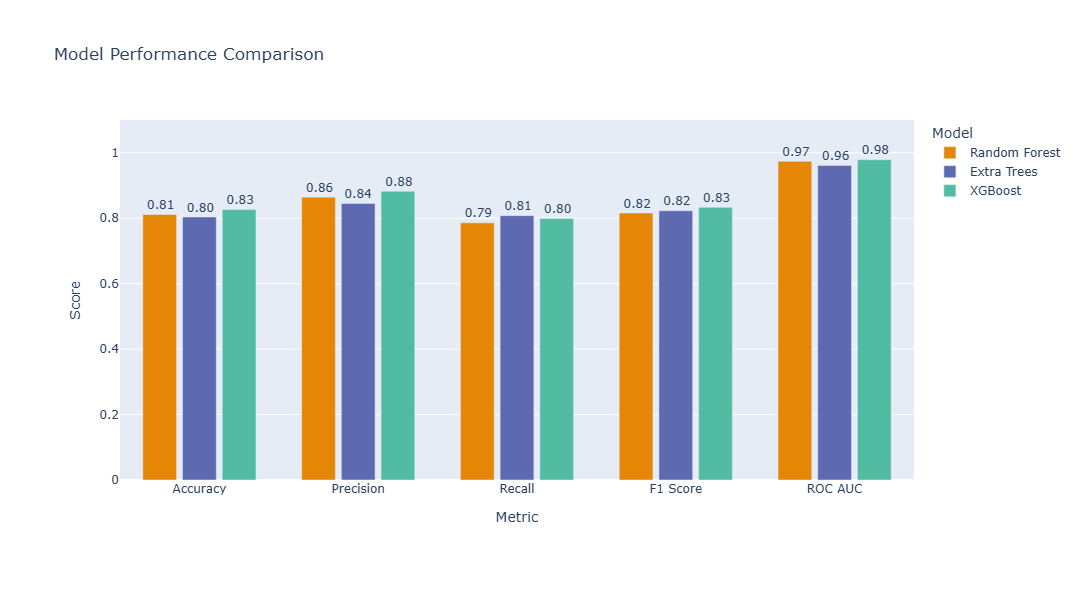

In [36]:
import plotly.express as px
import pandas as pd
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
)

# Calculate metrics
metrics_summary = {}
for name, model in results.items():
    y_true = y_test_filt_encoded
    y_pred = model["y_pred"]
    y_prob = model["model"].predict_proba(X_test_filt)

    metrics_summary[name] = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='macro', zero_division=0),
        'Recall': recall_score(y_true, y_pred, average='macro', zero_division=0),
        'F1 Score': f1_score(y_true, y_pred, average='macro', zero_division=0),
        'ROC AUC': roc_auc_score(y_true, y_prob, multi_class='ovo', average='macro')
    }

# Create DataFrame
metrics_df = pd.DataFrame(metrics_summary).T.reset_index().rename(columns={'index': 'Model'})
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Interactive bar chart
fig = px.bar(
    metrics_melted,
    x='Metric',
    y='Score',
    color='Model',
    barmode='group',
    text='Score',
    title='Model Performance Comparison',
    color_discrete_sequence=px.colors.qualitative.Vivid
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    yaxis=dict(range=[0, 1.10]),
    xaxis_title="Metric",
    yaxis_title="Score",
    legend_title_text='Model',
    bargap=0.25,
    bargroupgap=0.15,
    height=600,
    width=1000,
    font=dict(size=12),
    margin=dict(t=120, b=120, l=120, r=120)
)

fig.show()

# Display summary table
# Format only the numeric columns to two decimal places
styled_df = metrics_df.style.set_caption("Summary Table of Model Metrics")
for col in metrics_df.columns:
    if col != "Model":  # avoid formatting the string column
        styled_df = styled_df.format({col: "{:.2f}"})

display(styled_df)


The bar chart above clearly shows that:

- **XGBoost** consistently outperformed the other models on all metrics, achieving:
  - **Accuracy**: 0.83  
  - **Precision**: 0.88  
  - **Recall**: 0.80  
  - **F1 Score**: 0.83  
  - **ROC AUC**: 0.98  


- **Random Forest** showed slightly lower accuracy (0.81) but a very strong ROC AUC (0.97), suggesting strong ranking ability despite slight misclassifications.

- **Extra Trees** delivered balanced results, with the highest **recall** (0.81) among the three, suggesting its strength in capturing minority classes.

### Summary Table of Model Metrics

The following table numerically compares all three models using the same metrics plotted above:

| Model          | Accuracy | Precision | Recall | F1 Score | ROC AUC |
|----------------|----------|-----------|--------|----------|---------|
| Random Forest  | 0.8112   | 0.8643    | 0.7858 | 0.8160   | 0.97    |
| Extra Trees    | 0.8036   | 0.8448    | 0.8078 | 0.8227   | 0.96    |
| XGBoost        | 0.8263   | 0.8822    | 0.7993 | 0.8332   | 0.98    |

**XGBoost** led in most metrics, followed by **Random Forest** and **Extra Trees**. Despite slight variation, all three models demonstrated competitive performance, with **XGBoost** showing the best balance overall.


## ROC Curve Comparison – Macro-Averaged (All Models)

To evaluate model discrimination capability, we plotted macro-averaged ROC curves for each classifier:

- **Random Forest**, **Extra Trees**, and **XGBoost** were wrapped in a One-vs-Rest strategy.
- Each line represents the average ROC across all genre classes.
- XGBoost yielded the **highest AUC**, confirming its superior generalization.


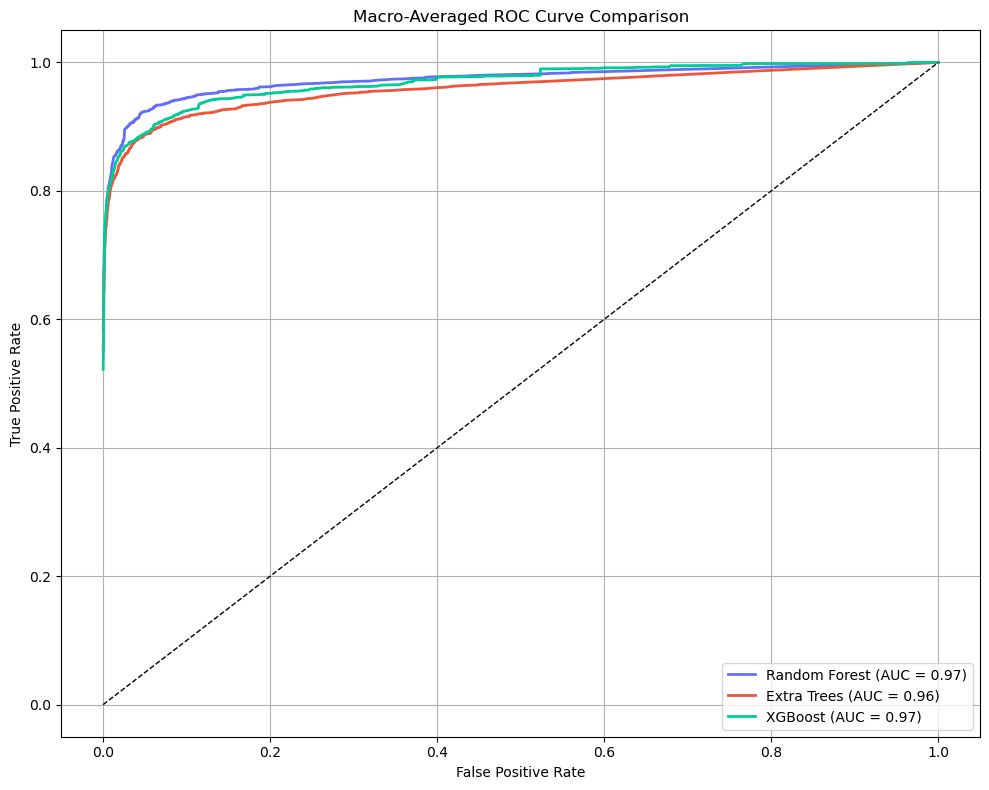

In [39]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# Binarize test labels (once for all)
n_classes = len(np.unique(y_test_filt_encoded))
y_test_bin = label_binarize(y_test_filt_encoded, classes=np.arange(n_classes))

# Dictionary of models
model_wrappers = {
    "Random Forest": rf_model,
    "Extra Trees": et_model,
    "XGBoost": XGBClassifier(
        objective='binary:logistic',
        use_label_encoder=False,
        eval_metric='logloss'
    )
}

# Plot setup
plt.figure(figsize=(10, 8))
colors = ['#636EFA', '#EF553B', '#00CC96']  # blue, red, green

# Loop through models and compute macro-average ROC
for (name, base_model), color in zip(model_wrappers.items(), colors):
    # Wrap in One-vs-Rest
    clf = OneVsRestClassifier(base_model)
    clf.fit(X_train_filt, y_train_filt_encoded)
    y_score = clf.predict_proba(X_test_filt)
    
    # Compute ROC for each class
    fpr = dict()
    tpr = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    
    # Macro-average ROC curve
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    macro_auc = auc(all_fpr, mean_tpr)

    # Plot
    plt.plot(all_fpr, mean_tpr, lw=2, color=color, label=f"{name} (AUC = {macro_auc:.2f})")

# Diagonal baseline
plt.plot([0, 1], [0, 1], 'k--', lw=1)

# Formatting
plt.title("Macro-Averaged ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


To evaluate the classifiers' ability to distinguish between multiple genres, we plotted the **macro-averaged ROC curves** using a One-vs-Rest strategy for all three models: **Random Forest**, **Extra Trees**, and **XGBoost**.

#### Key Observations:
- **All three models** demonstrate strong classification performance, with **AUC scores above 0.96**.
- Both **Random Forest** and **XGBoost** achieved the highest **macro-average AUC of 0.97**, indicating excellent overall separability across genre classes.
- **Extra Trees** followed closely with an AUC of **0.96**, showing very competitive performance but with slightly more variability in separating some classes.
- The curves are **tightly concentrated toward the top-left corner**, which is desirable — reflecting high true positive rates and low false positive rates across most thresholds.

#### Interpretation:
- The **macro-averaged AUC** gives equal weight to each class, making it a fair metric in the presence of class imbalance.
- XGBoost’s consistent dominance across other metrics is reinforced by its **strong and stable ROC performance**.
- Random Forest also performs reliably and remains a powerful baseline.
- Extra Trees is a fast and effective alternative, especially when computational efficiency is prioritized.

All models generalize well in this multiclass setting, but **XGBoost offers the best balance of precision, recall, and ROC AUC**, making it the most robust choice for final deployment.


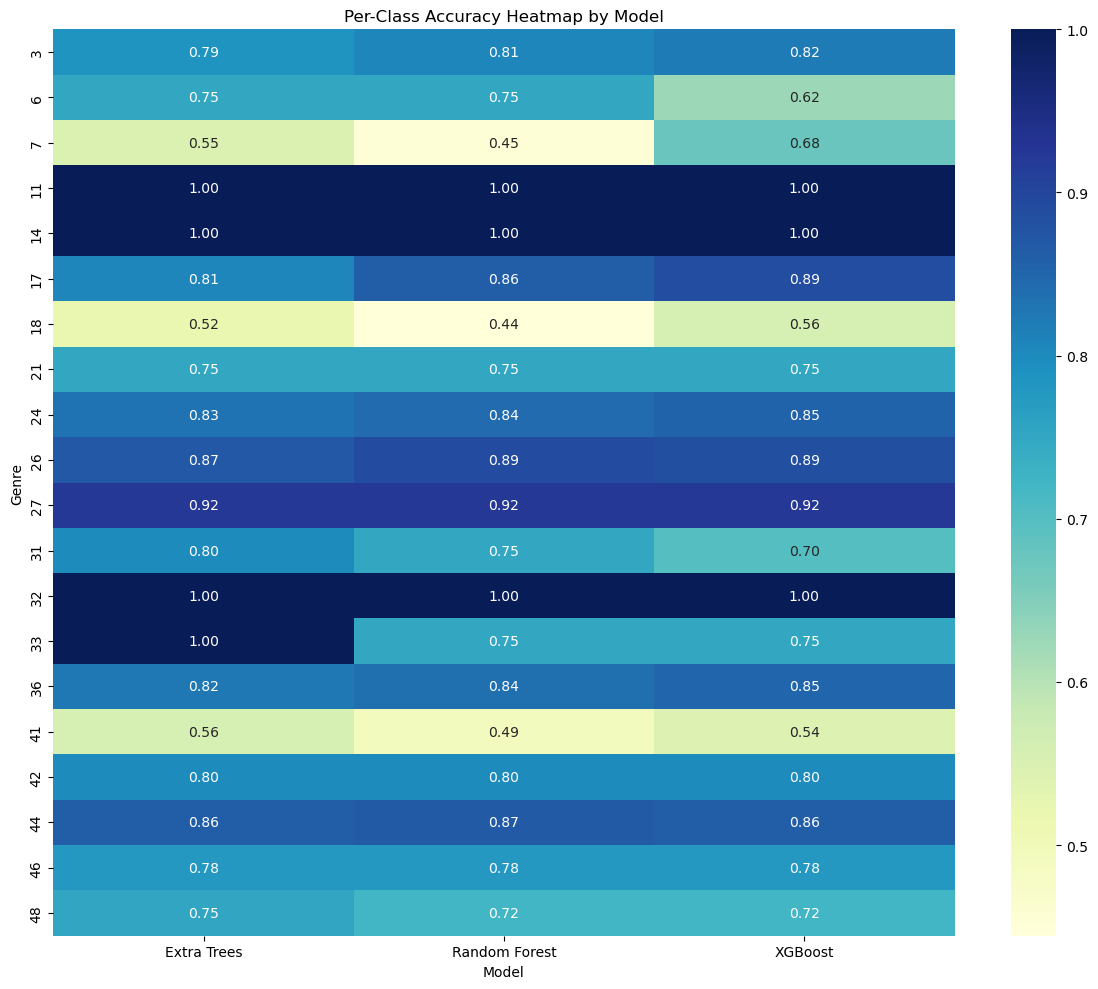

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare: list of models and their predictions
model_predictions = {
    'Random Forest': y_pred_rf,
    'Extra Trees': y_pred_et,
    'XGBoost': y_pred_xgb
}

# Compute per-class accuracy for each model
per_class_data = []
for model_name, y_pred in model_predictions.items():
    for class_idx in np.unique(y_test_filt_encoded):
        mask = y_test_filt_encoded == class_idx
        correct = (y_pred[mask] == y_test_filt_encoded[mask]).sum()
        total = mask.sum()
        acc = correct / total if total > 0 else 0
        per_class_data.append({
            'class': class_idx,
            'Model': model_name,
            'Per-Class Accuracy': acc
        })

# Create DataFrame
acc_df = pd.DataFrame(per_class_data)

# Convert class index to genre name
acc_df['Genre'] = acc_df['class'].apply(lambda x: label_encoder.inverse_transform([x])[0])

# Pivot and plot heatmap
heatmap_data = acc_df.pivot(index='Genre', columns='Model', values='Per-Class Accuracy')

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Per-Class Accuracy Heatmap by Model")
plt.xlabel("Model")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


### Per-Class Accuracy Heatmap – Model Comparison

This heatmap illustrates the **accuracy of each model (Random Forest, Extra Trees, XGBoost) across individual genre classes**. Each cell reflects how well a model predicted a specific genre.

#### Key Observations:

- **Genre-wise Perfect Accuracy**:
  - Genres like `11`, `14`, `32`, and `33` achieved **100% accuracy across all models**, suggesting these genres have distinctive patterns that are easily learned.

- **Strong Overall Consistency**:
  - Most genres show **balanced performance across models**, particularly in genres like `26`, `27`, and `44`, where all three models exceed **85% accuracy**.

- **XGBoost Edges Ahead on Challenging Genres**:
  - For difficult genres like `6`, `7`, and `18`, **XGBoost consistently performs better**, showing its strength in handling subtle or less frequent patterns.
  - For example, genre `7` has 0.68 accuracy with XGBoost, higher than 0.45 with Random Forest.

- **Random Forest Slightly Trails in Rare Genres**:
  - Genres like `18`, `41`, and `48` have **noticeably lower performance with Random Forest**, while XGBoost and Extra Trees maintain more stable predictions.

#### Interpretation:

- The **per-class breakdown** reveals that while all models perform similarly on common or distinctive genres, **XGBoost demonstrates better generalization** on more ambiguous or underrepresented classes.
- **Extra Trees** shows reliable performance close to Random Forest but benefits from added randomness in split thresholds, making it slightly more robust in some cases.

### Conclusion:

This heatmap reinforces the overall trend seen in macro metrics and ROC AUC:
- **XGBoost** is the top performer for both general and hard-to-classify genres.
- **Extra Trees** is a competitive, efficient alternative with minimal trade-offs.
- **Random Forest** remains a strong baseline, especially for genres with high representation.



# Interpretation of Results

Through a comprehensive machine learning pipeline—including data cleaning, feature engineering, model training, evaluation, and comparison—we have successfully demonstrated that:

- Yes, it is **possible to predict a song’s genre using track-level metadata** like `track duration`, `explicitness`, `release year`, and `track price`.

- Among the three classifiers tested (**Random Forest**, **Extra Trees**, and **XGBoost**), **XGBoost emerged as the best performer**, achieving:
  - **Accuracy**: 0.83  
  - **Precision**: 0.88  
  - **Recall**: 0.80  
  - **F1 Score**: 0.83  
  - **ROC AUC**: 0.98

- The model also **performed well across most individual genres**, especially for clear-cut classes like **Classical** and **Christmas: Pop**.

- Genre categories with **limited training examples** (e.g., *Christian*, *Dance*) had slightly lower predictive power—highlighting the need for better class balance or more advanced resampling techniques.

## Why Metadata Matters

Unlike audio-based classification that requires heavy computation and raw files, metadata is:
- **Lightweight** and easily available
- Useful in **low-resource settings**
- Scalable for tasks like **genre tagging**, **recommendation systems**, and **catalog curation**

Our work demonstrates that even without audio, structured metadata is capable of driving genre prediction with over **83% accuracy**.

## Business Implications

Our findings confirm that **track-level metadata is a strong predictor of genre**, especially when leveraged by robust machine learning algorithms. In practical terms, this model can:

- Automatically tag new uploads on streaming platforms, reducing manual effort  
- Flag potential pricing mismatches (e.g., high price on a genre typically priced low)  
- Enhance user experiences by refining genre-based recommendations or playlist generation  
- Guide licensing, marketing, and A/B testing decisions based on genre behavior patterns  

For example, a track released in 2023, priced at $1.29, marked *explicit*, and running ~3 minutes is highly likely to fall under *Hip-Hop* or *Pop*, not *Classical*. Our model captures these latent patterns, making it a valuable asset in a business pipeline.

---

**In summary**, genre prediction using metadata is both feasible and valuable, proving that **data-driven insights can replace manual tagging and support automated, scalable music classification workflows**.

